In [1]:
# Librerías a utilizar
#BUEN TRABAJO 
#5.0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Lectura del dataframe
df=pd.read_csv("auto.csv")
df

Unnamed: 0  symboling  normalized-losses         make aspiration   
0             0          3                122  alfa-romero        std  \
1             1          3                122  alfa-romero        std   
2             2          1                122  alfa-romero        std   
3             3          2                164         audi        std   
4             4          2                164         audi        std   
..          ...        ...                ...          ...        ...   
196         196         -1                 95        volvo        std   
197         197         -1                 95        volvo      turbo   
198         198         -1                 95        volvo        std   
199         199         -1                 95        volvo      turbo   
200         200         -1                 95        volvo      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...   
0            two  convertible          rwd           front        88.6  ...  \
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   
200         four        sedan          rwd           front       109.1  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price   
0                  9.0       111.0    5000.0        21          27  13495.0  \
1                  9.0       111.0    5000.0        21          27  16500.0   
2                  9.0       154.0    5000.0        19          26  16500.0   
3                 10.0       102.0    5500.0        24          30  13950.0   
4                  8.0       115.0    5500.0        18          22  17450.0   
..                 ...         ...       ...       ...         ...      ...   
196                9.5       114.0    5400.0        23          28  16845.0   
197                8.7       160.0    5300.0        19          25  19045.0   
198                8.8       134.0    5500.0        18          23  21485.0   
199               23.0       106.0    4800.0        26          27  22470.0   
200                9.5       114.0    5400.0        19          25  22625.0   

     city-L/100km horsepower-binned  diesel  gas  
0       11.190476            Medium       0    1  
1       11.190476            Medium       0    1  
2       12.368421            Medium       0    1  
3        9.791667            Medium       0    1  
4       13.055556            Medium       0    1  
..            ...               ...     ...  ...  
196     10.217391            Medium       0    1  
197     12.368421              High       0    1  
198     13.055556            Medium       0    1  
199      9.038462            Medium       1    0  
200     12.368421            Medium       0    1  

[201 rows x 30 columns]

In [60]:
# Imprimimos los nombres de todas las características que hay en la base de datos sobre los autos
print("Todos los nombre de las columnas en el dataframe:")
df.columns.values

Todos los nombre de las columnas en el dataframe:


array(['Unnamed: 0', 'symboling', 'normalized-losses', 'make',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'horsepower-binned', 'diesel', 'gas'], dtype=object)

### **Primer plot**

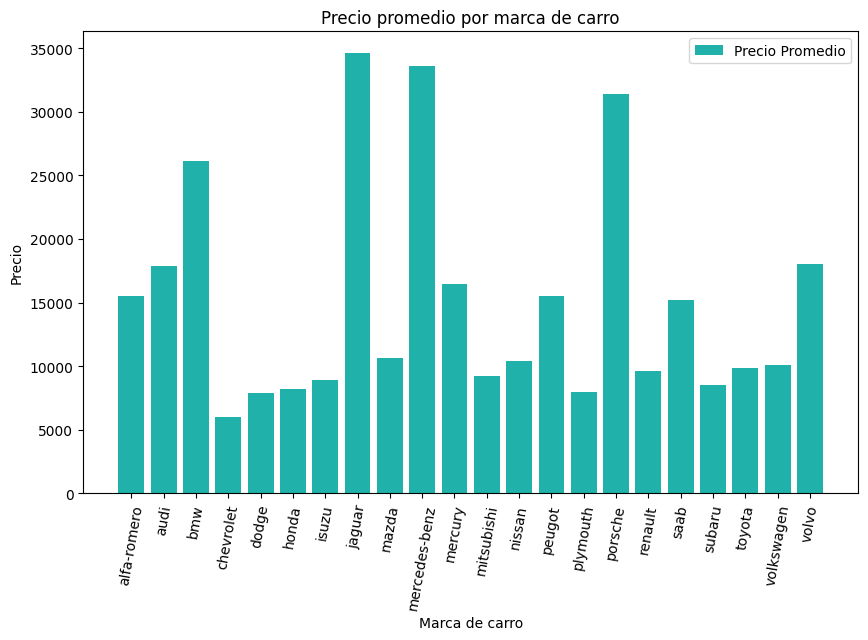

In [74]:
# Se obtiene los nombres de los carros existentes en el dataframe
car_make_list = np.array(df.groupby("make").price.mean().keys())
# Se guardan los precios promedios correspondientes a cada marca
mean_price_list = np.array(df.groupby("make").price.mean())

# Histograma de los precios promedio por cada marca de carro
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(0, len(car_make_list), 1)
ax.bar(x, mean_price_list, label = "Precio Promedio", color = "lightseagreen")
ax.set_xticks(x)
ax.set_title("Precio promedio por marca de carro")
ax.set_xlabel("Marca de carro")
ax.set_ylabel("Precio")
ax.set_xticklabels(car_make_list, minor=False, rotation=80)
ax.legend()
plt.show()

**Figura 1: Histograma que presenta los precios promedio por marca de carro.**

Con base en la gráfica anteriormente presentada, podemos concluir que, *Jaguar* es la marca de autos que en promedio es más costosa, seguida de cerca por *Mercedes-Benz* y *Porsche*. Asimismo, la marca que en promedio es más económica corresponde a *Chevrolet*, y hay muchas otras que se mantienen en un rango de valor promedio relativamente cercano. Sin embargo, hay que resaltar que en este análisis estamos es considerando valores promedios sobre los datos de la base de datos, es decir que no hacemos una distinción entre los distintos modelos y gamas que manejan cada compañía, por lo que no podríamos descartar que por ejemplo, *Audi* produzca un modelo más costoso que todos los de *Jaguar*.

### **Segundo plot**

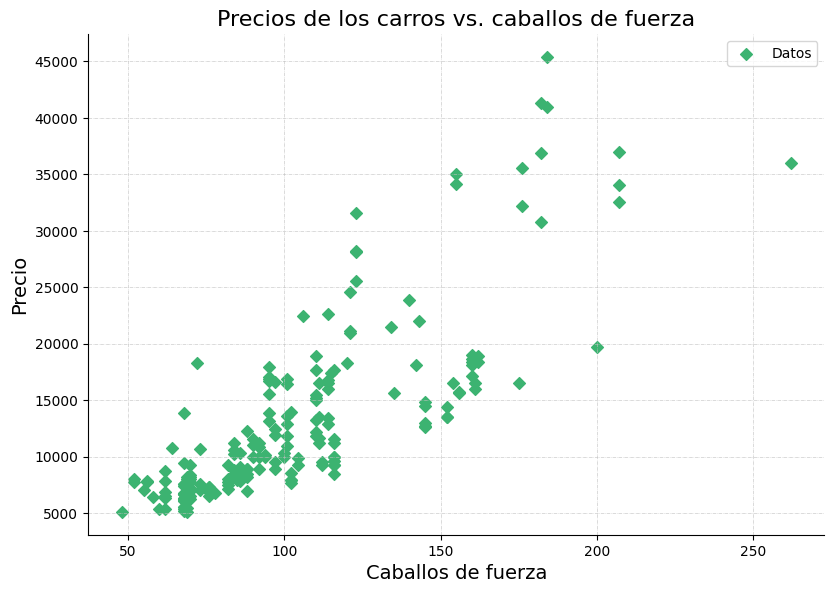

In [71]:
# Creamos una copia del dataframe
df_horsepower_sorted = df.copy()
# Se organiza el dataframe de acuerdo con los valores de la columna Caballos de Fuerza
df_horsepower_sorted.sort_values("horsepower", inplace = True)
# Se obtiene arreglos con los valores de caballos de fuerza y la correspondiente con el precio
horsepower_car = np.array(df_horsepower_sorted["horsepower"])
price_car = np.array(df_horsepower_sorted["price"])

# Gráfica de los anteriores arreglos
plt.figure(figsize = (9.5,6.5)) # Para ajustar el tamaño de la gráfica
plt.scatter(horsepower_car, price_car,  marker = "D", color = "mediumseagreen", label = "Datos")
plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Precios de los carros vs. caballos de fuerza', fontsize = 16) # Título
plt.xlabel('Caballos de fuerza', fontsize = 14) # label eje x
plt.ylabel('Precio', fontsize = 14) # label eje y
plt.legend()
plt.show()

**Figura 2: Diagrama de dispersión que muestra los datos de precio en función de los caballos de fuerza.**

De acuerdo con esta gráfica, podemos observar que hay cierta correlación entre los caballos de fuerza de los automóviles, y su precio. Se puede notar que de manera general, es de esperarse que un mayor valor de los caballos de fuerza, esté asociado con un mayor precio; y un menor valor de caballos de fuerza con menor precio. 

### **Tercer plot**

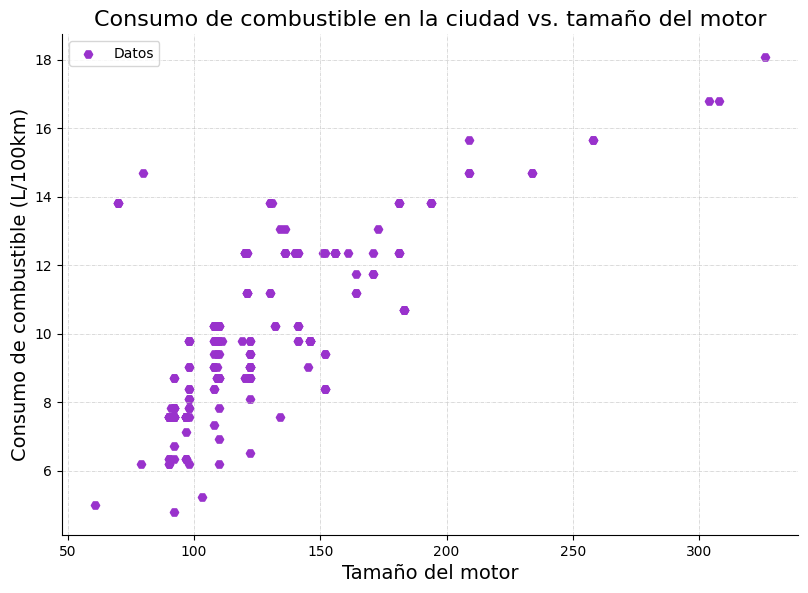

In [75]:
# Generamos una copia del dataframe
df_eng_size_sorted = df.copy()
# Renombramos los nombres de las columnas de tamaño de motor y consumo de combustible
df_eng_size_sorted.rename(columns={'engine-size': 'engine_size'}, inplace=True)
df_eng_size_sorted.rename(columns={'city-L/100km': 'fuel_consumption'}, inplace=True)
# Reordenamos el dataframe de acuerdo con los valores en la columna de tamaño del motor
df_eng_size_sorted.sort_values("engine_size", inplace = True)
# Se obtiene arreglos con los valores de tamaño del motor y consumo de combustible
eng_size_car = np.array(df_eng_size_sorted["engine_size"])
fuel_consumption_car = np.array(df_eng_size_sorted["fuel_consumption"])

# Gráfica de los anteriores arreglos
plt.figure(figsize = (9.5,6.5)) # Para ajustar el tamaño de la gráfica
plt.scatter(eng_size_car, fuel_consumption_car,  marker = "H", color = "darkorchid", label = "Datos")
plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Consumo de combustible en la ciudad vs. tamaño del motor', fontsize = 16) # Título
plt.xlabel('Tamaño del motor', fontsize = 14) # label eje x
plt.ylabel("Consumo de combustible (L/100km)", fontsize = 14) # label eje y
plt.legend()
plt.show()


**Figura 3: Diagrama de dispersión que muestra los datos de consumo de combustible en función del tamaño del motor.**

A partir del comportamiento que se observa en la anterior gráfica, podemos notar que en este caso hay una correlación incluso más clara entre el rendimiento en términos del consumo de combustible, y el tamaño del motor: una mayor medida del tamaño del motor, está relacionada con un mayor consumo de combustible por distancia recorrida, es decir un peor rendimiento en este sentido; y un menor tamaño del motor, con menor consumo de combustible.

### **Informe para gerente de ventas**

A partir del estudio sobre la base de datos de los autos, que fue realizada previamente, se pueden resaltar las siguientes relaciones, para tomar en consideración a la hora de diseñar las estrategias de ventas de la compañía:

1. Relación precio - marca: En la figura 1, se presentó un histograma con los valores promedios de precio para cada marca. Esto nos permitió identificar las marcas más caras y las más económicas. Estudiar esta relación es importante ya que nos ayuda a pensar en cómo se puede ofertar una gama de valores más variada dentro de la compañía, y de esta manera ampliar el alcance que se puede tener en términos de los clientes a los cuales se enfocan las ventas. Entonces por ejemplo, ofertar modelos de *Porsche* y *Chevrolet* puede atraer un grupo de compradores más amplio que con respecto a *Toyota* y *Volkswagen*. Por otra parte, si hay periodos en los que el presupuesto de la compañía sea limitado, y no se tenga tanta libertad como para implementar este tipo de estrategias, con este estudio de la relación precio - marca, podremos también identificar las marcas de menor costo, y sobre las cuales enfocar las ventas.

2. Relacion consumo de combustible - tamaño del motor: En la figura 3, se presentó un diagrama de dispersión mostrando el comportamiento de los datos de consumo de combustible (L/100km) en función del tamaño del motor. Este nos permitió identificar con claridad la correlación existente entre ambas variables. Este relación se puede considerar importante tenerla presente en las ventas, dado que puede permitir orientar mejor los esfuerzos de los vendedores: una vez identificada la facilidad económica del cliente, se podrá saber si es conveniente ofrecerle un automóvil con un motor más grande o pequeño, en el sentido en que, un carro con un gran consumo de combustible por distancia recorrida seguramente implicará una carga económica más grande a largo plazo. Asimismo si los clientes llegan con cierta preferencia por los beneficios que puedan traer los motores grandes, por ejemplo, el vendedor podrá advertirle de manera oportuna, sobre las consecuencias que acarrea en términos del consumo de combustible.

